# main part for read and perpare and extract

In [1]:
import warnings
warnings.filterwarnings("ignore")
import glob
import re
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from pywt import wavedec
import pywt
from scipy.signal import butter, filtfilt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from scipy import signal
from scipy.signal import periodogram

# Define the class labels
class_labels = {
    'yukarı':0 ,
    'yukari': 0,
    'asagi': 1,
    'sag': 2,
    'sol': 3,
    'kirp': 4
}

class_names = {
    0: 'Up',
    1: 'Down',
    2: 'Right',
    3: 'Left',
    4: 'Blink'
}

h=[]
classes=class_labels.keys()

# Define the butter_lowpass_filter function
def butter_bandpass_filter(Input_Signal,LOW_Cutoff,High_cuttOff,Sampling_Rate,order):
    nyq = 0.5 *Sampling_Rate
    low = LOW_Cutoff/ nyq
    high = High_cuttOff / nyq
    Numerator,denominator = butter(order,[low,high],btype = "band",output = "ba",analog = False,fs = None)
    filtered = filtfilt(Numerator,denominator,Input_Signal)
    return filtered

def rsample_filter(Filtered_Data):
    resampled_Signal = []
    for i in Filtered_Data:
        re_Sgnl = signal.resample(i,60)
        resampled_Signal.append(re_Sgnl)
    return resampled_Signal

def extract_raw_features(signal):
    # Compute statistical features
    mean_value = np.mean(signal)
    variance = np.var(signal)
    skewness = scipy.stats.skew(signal)
    kurtosis = scipy.stats.kurtosis(signal)
    # Compute frequency-domain features using FFT
    fft_result = np.fft.fft(signal)
    spectral_power = np.abs(fft_result) ** 2
    return [mean_value, variance, skewness, kurtosis] + list(spectral_power)

def extract_wavelet_features(signal, wavelet='db4', level=3):
    # Perform wavelet decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    wavelet_features = []
    # Extract statistical features from wavelet coefficients
    for coeff in coeffs:
        mean_value = np.mean(coeff)
        variance = np.var(coeff)
        energy = np.sum(np.square(coeff))
        entropy = -np.sum(np.square(coeff) * np.log(np.square(coeff)))
        wavelet_features.extend([mean_value, variance, energy, entropy])
    
    return wavelet_features

# Open the CSV file for writing
with open('Read_data.csv', 'w') as csv_file:
    for filename in glob.glob('C:/Users/AlQla/3-class/*.txt'):
        # Get the class label from the filename
        print(filename)
        h = filename.split('\\')[-1].split('.')[0]
        matches = re.split(r'(\d+)', h)
        print (matches)

        if len(matches)==3:
            print(len(matches))
            if matches[0] in classes :
                if  matches[2]=='h':
                    print(matches[2])
                    f=filename.replace('h','v')
                    try :
                        print(f)
                        with open(f, 'r') as file:
                            # Read the contents of the file and split it into lines
                            lines_v = file.read()
                        lines_v=lines_v.replace('\n',',')
                        for line in lines_v:
                            csv_file.write(line)
                        with open(filename, 'r') as file:
                            # Read the contents of the file and split it into lines
                            lines_h = file.read()
                        lines_h=lines_h.replace('\n',',')
                        for line in lines_h:
                            csv_file.write(line)

                        label = class_labels[matches[0]]
                        csv_file.write(str(label)+'\n')
                    except FileNotFoundError:
                        pass 

# Read the CSV file into a DataFrame
names=np.arange(0,503)
df = pd.read_csv('Read_data.csv', names=names)
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

# Apply the butter_lowpass_filter to your data
cutoff = 10  # Choose your cutoff frequency
SamplingRate = 1000  # Provide your sampling rate
order = 5  # Choose the filter order
filtered_Signal = butter_bandpass_filter(x,LOW_Cutoff=0.5,High_cuttOff=20.0,Sampling_Rate=176,order = 2)

res_rsample=rsample_filter(filtered_Signal)


# Extract features
raw_features = np.apply_along_axis(extract_raw_features, 1, res_rsample)
  
wavelet_features= np.apply_along_axis(extract_wavelet_features, 1, res_rsample)

combined_features = np.concatenate((raw_features, wavelet_features), axis=1)

print(combined_features)


# Now you can use these features (raw_features and wavelet_features) for further processing or modeling

C:/Users/AlQla/3-class\asagi10h.txt
['asagi', '10', 'h']
3
h
C:/Users/AlQla/3-class\asagi10v.txt
C:/Users/AlQla/3-class\asagi10v.txt
['asagi', '10', 'v']
3
C:/Users/AlQla/3-class\asagi11h.txt
['asagi', '11', 'h']
3
h
C:/Users/AlQla/3-class\asagi11v.txt
C:/Users/AlQla/3-class\asagi11v.txt
['asagi', '11', 'v']
3
C:/Users/AlQla/3-class\asagi12h.txt
['asagi', '12', 'h']
3
h
C:/Users/AlQla/3-class\asagi12v.txt
C:/Users/AlQla/3-class\asagi12v.txt
['asagi', '12', 'v']
3
C:/Users/AlQla/3-class\asagi13h.txt
['asagi', '13', 'h']
3
h
C:/Users/AlQla/3-class\asagi13v.txt
C:/Users/AlQla/3-class\asagi13v.txt
['asagi', '13', 'v']
3
C:/Users/AlQla/3-class\asagi14h.txt
['asagi', '14', 'h']
3
h
C:/Users/AlQla/3-class\asagi14v.txt
C:/Users/AlQla/3-class\asagi14v.txt
['asagi', '14', 'v']
3
C:/Users/AlQla/3-class\asagi15h.txt
['asagi', '15', 'h']
3
h
C:/Users/AlQla/3-class\asagi15v.txt
C:/Users/AlQla/3-class\asagi15v.txt
['asagi', '15', 'v']
3
C:/Users/AlQla/3-class\asagi16h.txt
['asagi', '16', 'h']
3
h
C:/

[[ 2.07507204e-01  9.71998168e+01 -2.76496047e+00 ...  2.65906906e+01
   8.87705718e+02 -4.39303840e+03]
 [ 2.74348754e-01  7.84450268e+01 -2.89467438e+00 ...  2.15272537e+01
   7.10564487e+02 -3.60740715e+03]
 [ 1.93449725e-01  7.19526029e+01 -3.02720556e+00 ...  6.17766930e+00
   2.17222369e+02 -8.56389523e+02]
 ...
 [ 2.39296501e-01  2.43626861e+02  9.60799425e-02 ...  1.01436460e+01
   3.35723347e+02 -1.23581476e+03]
 [-1.08356942e-01  1.85207815e+02  1.55962794e+00 ...  9.92107912e+00
   3.29230915e+02 -1.45881952e+03]
 [-7.20200439e-01  9.12241342e+01  2.84897414e+00 ...  5.01893765e+00
   1.92130563e+02 -7.28300499e+02]]


# psd extract feature only for test it 



In [2]:
x=np.array(x)
psd=[]
for i in x:
    
    (f,s)=scipy.signal.periodogram(i,176,scaling='density')
    psd.append(s)
print(psd)

[array([7.00003339e-31, 1.80326182e+01, 1.25615371e+02, 2.53381864e+01,
       1.49379438e+01, 6.15886704e+00, 6.87106739e+01, 4.60159012e+00,
       1.67896178e+01, 5.07288951e+00, 3.38780849e+01, 8.22628628e-01,
       1.31409773e+01, 2.85629240e+00, 1.30767852e+01, 5.84382605e-01,
       7.45608935e+00, 7.23686863e-01, 4.92262564e+00, 9.59686632e-01,
       1.71377381e+00, 6.75480025e-01, 6.95304031e-01, 8.19704178e-01,
       4.83413134e-01, 4.61851844e-02, 4.05319028e-02, 2.54320309e-01,
       1.40873887e+00, 9.06049304e-02, 1.61142099e-01, 2.31015930e-01,
       1.23045331e+00, 7.22754269e-02, 7.07439313e-01, 1.97762898e-01,
       3.31889831e-01, 1.45577148e-01, 1.34754418e+00, 1.53605841e-01,
       2.48248476e-01, 7.79484187e-01, 2.00394376e-01, 2.61767453e-02,
       5.15928266e-02, 1.90345733e-01, 3.93557505e-01, 4.02610641e-02,
       7.89933559e-02, 7.10552418e-02, 3.06797032e-01, 1.40383232e-02,
       2.71345848e-01, 5.22544566e-02, 9.56474696e-02, 2.82348237e-01,
     

In [3]:
X_train, X_test, y_train, y_test = train_test_split(psd, y, test_size=0.20, random_state=40,stratify = y)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Accuracy:100.00%
Test Accuracy:80.00%
Error: 0.2
[[3 0 1 0 0]
 [0 3 0 1 0]
 [0 0 3 1 0]
 [0 0 1 3 0]
 [0 0 0 0 4]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

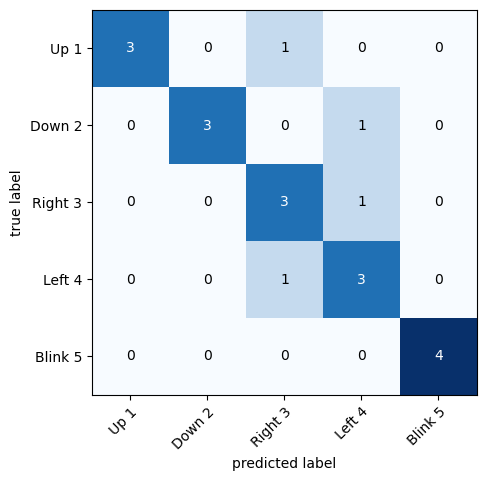

In [4]:
# Initialize the SVC classifier with your desired parameters
svm = SVC(kernel = 'rbf',C = 16)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict using the classifier
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:{:.2%}".format(train_accuracy))
print("Test Accuracy:{:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)
plot_confusion_matrix(conf_mat, class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"], figsize=(12,5))

# Compare using raw samples and wavelets coefficients

# raw

In [5]:
X_train, X_test, y_train, y_test = train_test_split(raw_features, y, test_size=0.20, random_state=40,stratify = y)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Accuracy:100.00%
Test Accuracy:90.00%
Error: 0.1
[[3 0 0 1 0]
 [0 4 0 0 0]
 [0 0 3 0 1]
 [0 0 0 4 0]
 [0 0 0 0 4]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

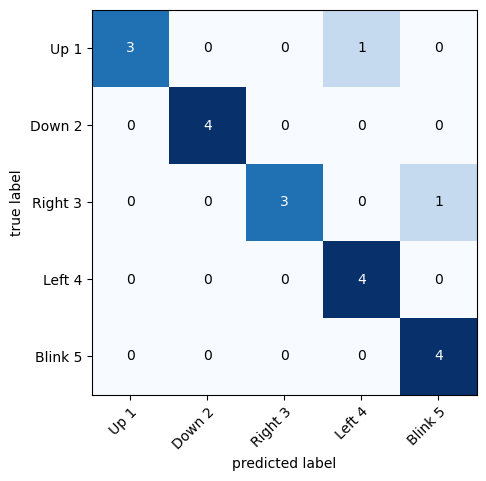

In [6]:
# Initialize the SVC classifier with your desired parameters
svm = SVC(kernel = 'rbf',C = 16)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict using the classifier
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:{:.2%}".format(train_accuracy))
print("Test Accuracy:{:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)
plot_confusion_matrix(conf_mat, class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"], figsize=(12,5))

# wawlet only

In [7]:
def wavelet_feature_ext(Signal):
    coeffs = wavedec(Signal , 'db4', level = 3)
    featur = pywt.waverec([coeffs[0],coeffs[1]],'db1')
    
    return featur
w_f=wavelet_feature_ext(x)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(w_f, y, test_size=0.20, random_state=40,stratify = y)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Accuracy:100.00%
Test Accuracy:95.00%
Error: 0.05
[[3 0 0 0 1]
 [0 4 0 0 0]
 [0 0 4 0 0]
 [0 0 0 4 0]
 [0 0 0 0 4]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

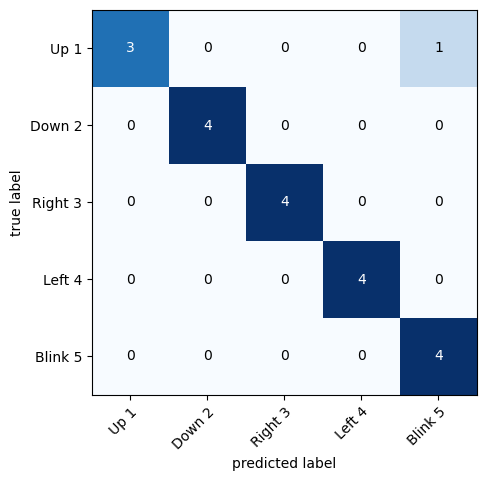

In [9]:
# Initialize the SVC classifier with your desired parameters
svm = SVC(kernel = 'rbf',C = 16)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict using the classifier
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:{:.2%}".format(train_accuracy))
print("Test Accuracy:{:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)
plot_confusion_matrix(conf_mat, class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"], figsize=(12,5))

# wavlet with stat

In [10]:
X_train, X_test, y_train, y_test = train_test_split(wavelet_features, y, test_size=0.20, random_state=40,stratify = y)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Accuracy:88.75%
Test Accuracy:50.00%
Error: 0.39
[[1 0 0 2 1]
 [2 1 0 0 1]
 [0 0 3 1 0]
 [1 0 2 1 0]
 [0 0 0 0 4]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

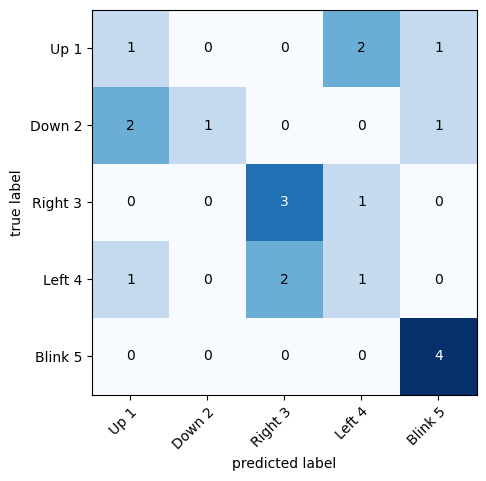

In [11]:
# Initialize the SVC classifier with your desired parameters
svm = SVC(kernel = 'rbf',C = 16)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict using the classifier
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:{:.2%}".format(train_accuracy))
print("Test Accuracy:{:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)
plot_confusion_matrix(conf_mat, class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"], figsize=(12,5))

# combind feature

In [12]:
X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.20, random_state=40,stratify = y)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# with svm

Train Accuracy:100.00%
Test Accuracy:95.00%
Error: 0.05
    502
81    0
64    3
86    0
51    2
65    3
32    4
87    0
50    2
20    4
43    2
14    1
42    2
85    0
77    3
10    1
8     1
66    3
29    4
3     1
38    4


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

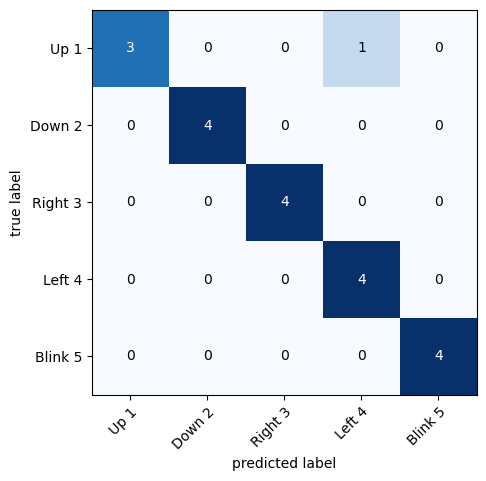

In [13]:
# Initialize the SVC classifier with your desired parameters
svm = SVC(kernel = 'rbf',C = 16)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict using the classifier
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:{:.2%}".format(train_accuracy))
print("Test Accuracy:{:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)
print(y_test)
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat, class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"], figsize=(12,5))

# with random forest

Train Accuracy: 98.75%
Test Accuracy: 90.00%
Error: 0.09


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

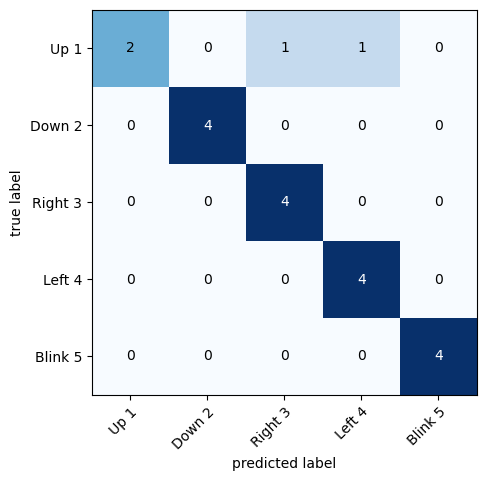

In [14]:
rf_classifier = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=2)
# Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
rf_classifier.fit(X_train, y_train)

# Predict using the classifier
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy: {:.2%}".format(train_accuracy))
print("Test Accuracy: {:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat, class_names=["Up 1", "Down 2", "Right 3", "Left 4", "Blink 5"], figsize=(12,5))


# with xgb

Train Accuracy: 100.00%
Test Accuracy: 75.00%
Error: 0.25


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

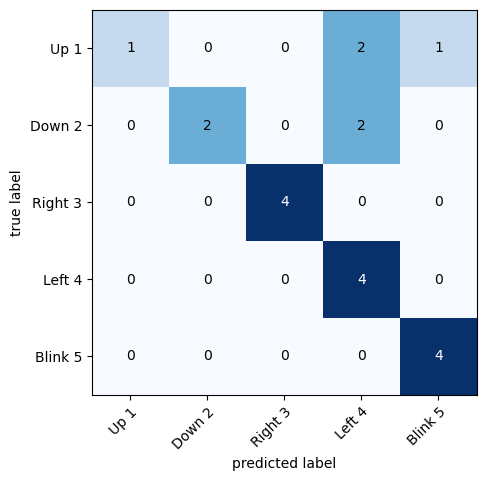

In [15]:
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

xgb_classifier.fit(X_train, y_train)

y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy: {:.2%}".format(train_accuracy))
print("Test Accuracy: {:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat, class_names=["Up 1", "Down 2", "Right 3", "Left 4", "Blink 5"], figsize=(12,5))